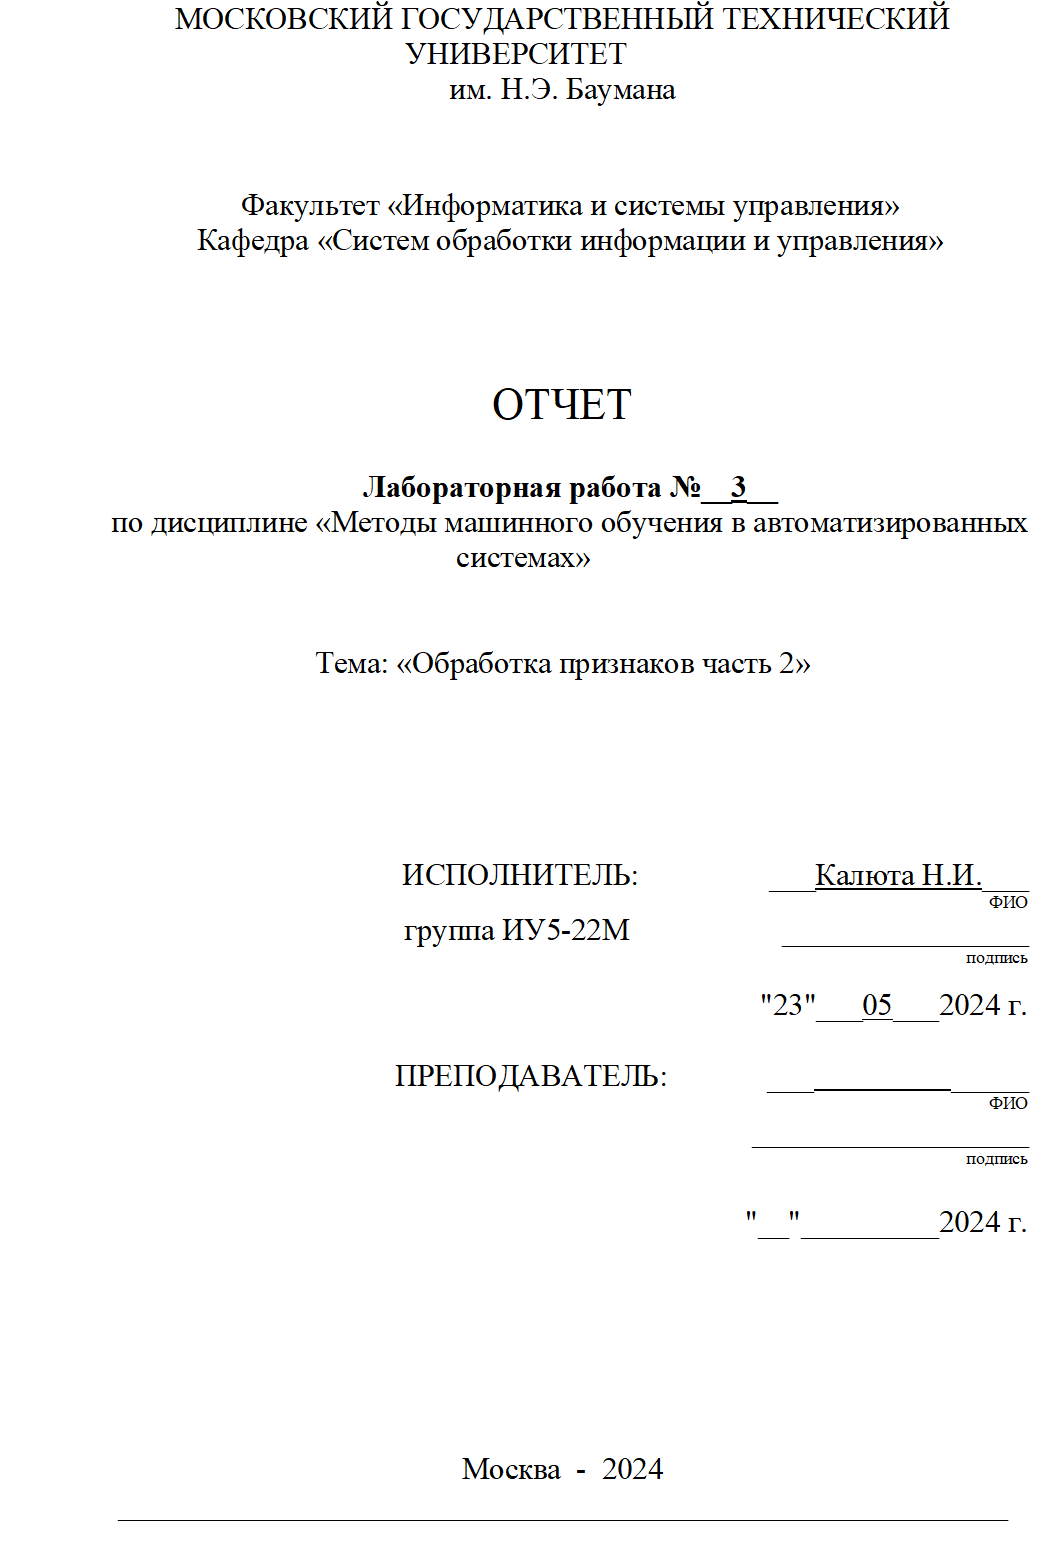

# Задание:

- Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  * масштабирование признаков (не менее чем тремя способами);
обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
  * обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
  * отбор признаков:
    - один метод из группы методов фильтрации (filter methods);
    - один метод из группы методов обертывания (wrapper methods);
    - один метод из группы методов вложений (embedded methods).

# Ход работы

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

## Датасет

Загружаем датасет:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Временные файлы/CarPrice_Assignment.csv")

Описание параметров датасета:
- CarID: Идентификационный номер для каждого автомобиля
- SafetyRating: Оценка безопасности автомобиля
- CarName: Название модели автомобиля
- FuelType: Тип используемого топлива (бензин, дизельное топливо, электричество и т.д.)
- Aspiration: Количество дверей в автомобиле
- NumDoors: Количество дверей в автомобиле
- BodyStyle: Тип кузова автомобиля (седан, купе, внедорожник и т.д.)
- DriveWheelType: Тип ведущих колес (передних, задних, всех)
- EngineLocation: Расположение двигателя автомобиля (спереди или сзади)
- Wheelbase: Длина колесной базы автомобиля
- CarLength: Общая длина автомобиля
- CarWidth: Ширина автомобиля
- CarHeight: Высота автомобиля
- CurbWeight: Масса автомобиля без пассажиров или груза
- EngineType: Тип двигателя (газовый, дизельный, электрический и т.д.)
- NumCylinders: Количество цилиндров в двигателе
- EngineSize: Размер двигателя автомобиля
- FuelSystem: Тип системы подачи топлива
- BoreRatio: Соотношение диаметра цилиндра и рабочего хода двигателя
- Stroke: Длина рабочего хода двигателя
- CompressionRatio: Степень сжатия двигателя
- Horsepower: Мощность двигателя автомобиля
- PeakRPM: Максимальная частота вращения двигателя (оборотов в минуту)
- CityMPG: Количество миль на галлон (миль на галлон) при движении по городу
- HighwayMPG: Количество миль на галлон на шоссе
- CarPrice: Цена автомобиля

In [5]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Масштабирование признаков

### Масштабирование данных на основе Z-оценки

In [7]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

standardScaler = StandardScaler()
data_standard_scaled_temp = standardScaler.fit_transform(df[numerical_features])
data_standard_scaled = pd.DataFrame(data_standard_scaled_temp, columns=numerical_features)
data_standard_scaled

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,1.153582


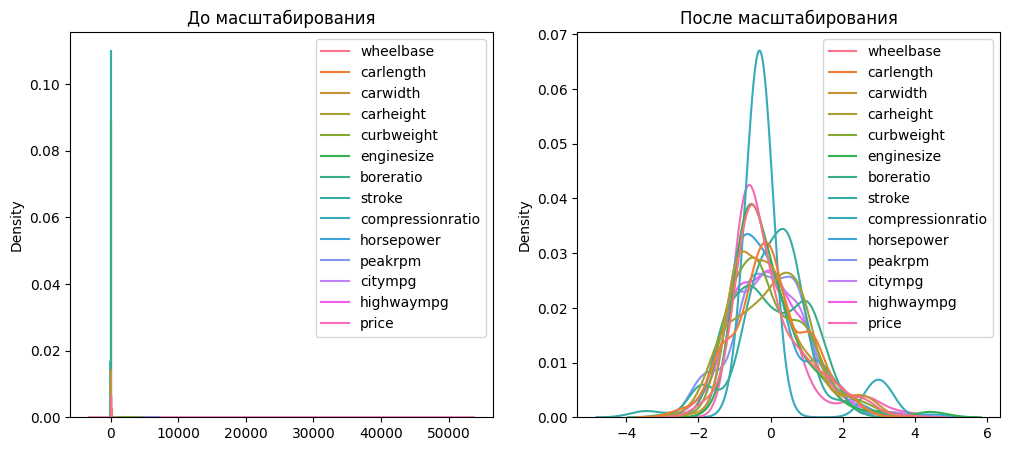

In [8]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2, figsize=(12, 5))

ax1.set_title("До масштабирования")
sns.kdeplot(data=df[numerical_features], ax=ax1)

ax2.set_title("После масштабирования")
sns.kdeplot(data=data_standard_scaled, ax=ax2)
plt.show()

### MinMax-масштабирование

In [9]:
minMaxScaler = MinMaxScaler()

data_minmax_scaled_temp = minMaxScaler.fit_transform(df[numerical_features])
data_minmax_scaled = pd.DataFrame(data_minmax_scaled_temp, columns=numerical_features)
data_minmax_scaled

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


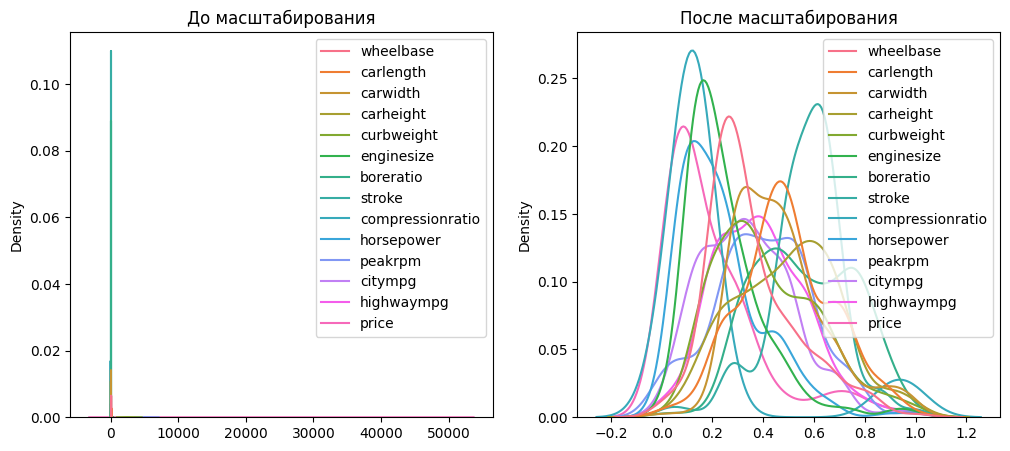

In [10]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2, figsize=(12, 5))

ax1.set_title("До масштабирования")
sns.kdeplot(data=df[numerical_features], ax=ax1)

ax2.set_title("После масштабирования")
sns.kdeplot(data=data_minmax_scaled, ax=ax2)
plt.show()

### Масштабирование по медиане

In [11]:
robustScaler = RobustScaler()

data_robust_scaled_temp = robustScaler.fit_transform(df[numerical_features])
data_robust_scaled = pd.DataFrame(data_robust_scaled_temp, columns=numerical_features)
data_robust_scaled

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.227273,0.372093,-2.033333,0.000,0.347826,-0.285714,-0.272727,-0.333333,0.367183
1,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.227273,0.372093,-2.033333,0.000,0.347826,-0.285714,-0.272727,-0.333333,0.711991
2,-0.316456,-0.119048,0.000000,-0.485714,0.517722,0.727273,-1.465116,0.600000,0.000,1.282609,-0.285714,-0.454545,-0.444444,0.711991
3,0.354430,0.202381,0.250000,0.057143,-0.097468,-0.250000,-0.279070,0.366667,1.250,0.152174,0.428571,0.000000,0.000000,0.419392
4,0.303797,0.202381,0.321429,0.057143,0.518987,0.363636,-0.279070,0.366667,-1.250,0.434783,0.428571,-0.545455,-0.888889,0.820998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.531646,0.928571,1.214286,0.400000,0.681013,0.477273,1.093023,-0.466667,0.625,0.413043,0.285714,-0.090909,-0.222222,0.751578
201,1.531646,0.928571,1.178571,0.400000,0.803797,0.477273,1.093023,-0.466667,-0.375,1.413043,0.142857,-0.454545,-0.555556,1.004016
202,1.531646,0.928571,1.214286,0.400000,0.756962,1.204545,0.627907,-1.400000,-0.250,0.847826,0.428571,-0.545455,-0.777778,1.283993
203,1.531646,0.928571,1.214286,0.400000,1.016456,0.568182,-0.697674,0.366667,17.500,0.239130,-0.571429,0.181818,-0.333333,1.397017


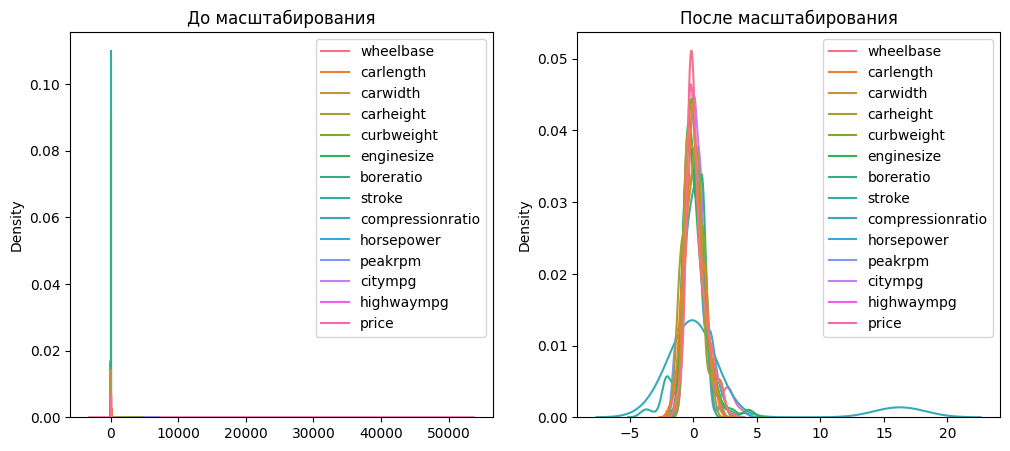

In [12]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2, figsize=(12, 5))

ax1.set_title("До масштабирования")
sns.kdeplot(data=df[numerical_features], ax=ax1)

ax2.set_title("После масштабирования")
sns.kdeplot(data=data_robust_scaled, ax=ax2)
plt.show()

Метод Mean Normalisation приводит распределение значений к нормальному закону смещая их медиану.

Метод MinMax-масштабирование приводит значение в общий диапазон с примерным сохранением их медиану.

Метод масштабирования по медиане приводит значение к медиане значений в 0.

In [13]:
df_ip = pd.read_csv('/content/drive/MyDrive/Временные файлы/asn-ipv4.csv', sep=",")

In [14]:
df_ip

,1.0.0.0,1.0.0.255,13335,"Cloudflare, Inc."
0,1.0.4.0,1.0.7.255,38803,Wirefreebroadband Pty Ltd
1,1.0.16.0,1.0.16.255,2519,ARTERIA Networks Corporation
2,1.0.32.0,1.0.32.255,141748,"QUANTUM DATA COMMUNICATIONS, INC."
3,1.0.64.0,1.0.127.255,18144,"Energia Communications,Inc."
4,1.0.128.0,1.0.255.255,23969,TOT Public Company Limited
...,...,...,...,...
363043,223.255.240.0,223.255.243.255,55649,Hong Kong Five Towns Development Co. Ltd.
363044,223.255.244.0,223.255.247.255,45117,Ishan's Network
363045,223.255.248.0,223.255.251.255,63199,"CDS Global Cloud Co., Ltd"
363046,223.255.252.0,223.255.253.255,58519,Cloud Computing Corporation


In [15]:
def ip_code(ip, level):
    arr = ip.split('.')
    if level > 4:
        level=4
    if level == 1:
        return arr[0]
    else:
        return '_'.join(arr[:level])

In [16]:
ip_features = []
for i in range(4):
    f = str('ip_' + str(i+1))
    df_ip[f] = df_ip.apply(lambda x: ip_code(x['1.0.0.0'], i+1), axis=1)
    ip_features.append(f)
ip_features

['ip_1', 'ip_2', 'ip_3', 'ip_4']

In [17]:
df_ip

,1.0.0.0,1.0.0.255,13335,"Cloudflare, Inc.",ip_1,ip_2,ip_3,ip_4
0,1.0.4.0,1.0.7.255,38803,Wirefreebroadband Pty Ltd,1,1_0,1_0_4,1_0_4_0
1,1.0.16.0,1.0.16.255,2519,ARTERIA Networks Corporation,1,1_0,1_0_16,1_0_16_0
2,1.0.32.0,1.0.32.255,141748,"QUANTUM DATA COMMUNICATIONS, INC.",1,1_0,1_0_32,1_0_32_0
3,1.0.64.0,1.0.127.255,18144,"Energia Communications,Inc.",1,1_0,1_0_64,1_0_64_0
4,1.0.128.0,1.0.255.255,23969,TOT Public Company Limited,1,1_0,1_0_128,1_0_128_0
...,...,...,...,...,...,...,...,...
363043,223.255.240.0,223.255.243.255,55649,Hong Kong Five Towns Development Co. Ltd.,223,223_255,223_255_240,223_255_240_0
363044,223.255.244.0,223.255.247.255,45117,Ishan's Network,223,223_255,223_255_244,223_255_244_0
363045,223.255.248.0,223.255.251.255,63199,"CDS Global Cloud Co., Ltd",223,223_255,223_255_248,223_255_248_0
363046,223.255.252.0,223.255.253.255,58519,Cloud Computing Corporation,223,223_255,223_255_252,223_255_252_0


## Отбор признаков

### Метод фильтрации, основанный на корреляции

<Axes: >

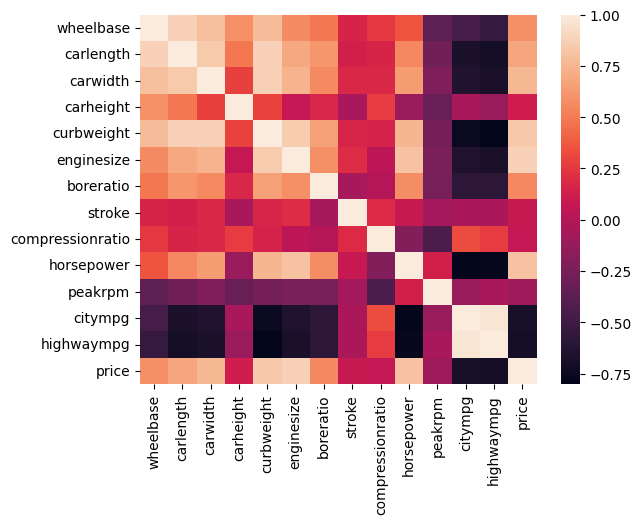

In [18]:
sns.heatmap(df[numerical_features].corr(), fmt='.3f')

In [19]:
cr = df[numerical_features].corr()
cr = cr.abs().unstack()
cr = cr.sort_values(ascending=False)
cr = cr[cr >= 0.8]
cr = cr[cr < 1]
cr = pd.DataFrame(cr).reset_index()
cr.columns = ['f1', 'f2', 'corr']

grouped_feature_list = []
correlated_groups = []

for feature in cr['f1'].unique():
    if feature not in grouped_feature_list:
        # находим коррелирующие признаки
        correlated_block = cr[cr['f1'] == feature]
        cur_dups = list(correlated_block['f2'].unique()) + [feature]
        grouped_feature_list = grouped_feature_list + cur_dups
        correlated_groups.append(cur_dups)
correlated_groups

[['citympg', 'highwaympg'],
 ['curbweight', 'wheelbase', 'carwidth', 'carlength'],
 ['price', 'curbweight', 'horsepower', 'enginesize']]

Только третья группа имеет целевой признак price, так что имеет смысл выбрать её

In [20]:
df[correlated_groups[2]]

,price,curbweight,horsepower,enginesize
0,13495.0,2548,111,130
1,16500.0,2548,111,130
2,16500.0,2823,154,152
3,13950.0,2337,102,109
4,17450.0,2824,115,136
...,...,...,...,...
200,16845.0,2952,114,141
201,19045.0,3049,160,141
202,21485.0,3012,134,173
203,22470.0,3217,106,145


### Методы обертывания (wrapper methods)

In [21]:
features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg']


train_x = df[features]
train_y = df["price"]

### Алгоритмы полного перебора

In [22]:
lr = LinearRegression()

In [ ]:
efs = EFS(lr,
           min_features=3,
           max_features=5,
           scoring='r2',
           print_progress=True,
           cv=5)

efs = efs.fit(train_x, train_y)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

## Методы вложений (embedded methods)

### Линейная регрессия

In [3]:
e_ls1 = Lasso(random_state=20)
e_ls1.fit(train_x, train_y)

NameError: name 'train_x' is not defined

In [ ]:
sel_e_ls1 = SelectFromModel(e_ls1)
list(zip(features, sel_e_ls1.get_support()))

[('wheelbase', True),
 ('carlength', True),
 ('carwidth', True),
 ('carheight', True),
 ('curbweight', True),
 ('enginesize', True),
 ('boreratio', True),
 ('stroke', True),
 ('compressionratio', True),
 ('horsepower', True),
 ('peakrpm', True),
 ('citympg', True),
 ('highwaympg', True)]